In [2]:
import numpy as np
import os
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

## Reading a photo in dataset

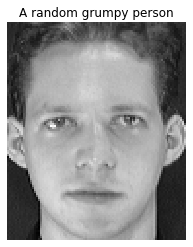

In [3]:
Base_dir = 'att_faces/'

img = cv2.imread(Base_dir + 's1/1.pgm', 0) # '0' for reading grayscale images

#IMG_SHAPE = img.shape

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('A random grumpy person')
plt.show()

## Prepraing dataset from folders

In [4]:
labels = []
filepaths = [] # Contains the absolute paths of all the image files
for s_i in os.listdir(Base_dir): # The folders containing the files are labelled as s1, s2, etc
    if s_i != 'README': # There is also a README file present in the data, this must be ignored
        for filename in os.listdir(Base_dir + s_i):
            filepaths.append(Base_dir + s_i + '/' + filename)
            labels.append(s_i)

## Converting labels to integers

In [5]:
from sklearn.preprocessing import LabelEncoder
labels = np.array(labels)
labels.shape



labelencoder = LabelEncoder()
labels = labelencoder.fit_transform(labels)
print(labels.shape)

(400,)


In [6]:
df = pd.DataFrame({'filepaths':filepaths})
display(df)

,filepaths
0,att_faces/s1/1.pgm
1,att_faces/s1/10.pgm
2,att_faces/s1/2.pgm
3,att_faces/s1/3.pgm
4,att_faces/s1/4.pgm
...,...
395,att_faces/s9/5.pgm
396,att_faces/s9/6.pgm
397,att_faces/s9/7.pgm
398,att_faces/s9/8.pgm


## Converting images to arrays with numpy

In [8]:
images = []
for filepath in df['filepaths']:
    images.append(cv2.imread(filepath, 0))
images = np.array(images)
df.head

<bound method NDFrame.head of                filepaths
0     att_faces/s1/1.pgm
1    att_faces/s1/10.pgm
2     att_faces/s1/2.pgm
3     att_faces/s1/3.pgm
4     att_faces/s1/4.pgm
..                   ...
395   att_faces/s9/5.pgm
396   att_faces/s9/6.pgm
397   att_faces/s9/7.pgm
398   att_faces/s9/8.pgm
399   att_faces/s9/9.pgm

[400 rows x 1 columns]>

## Resizing all the images to a fixed sized 

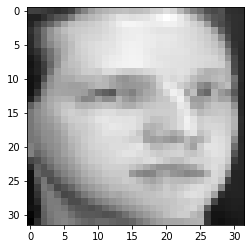

In [9]:
#Resizing to 32x32
from skimage.transform import resize
train = [resize(img, (32, 32)) for img in images]

#showing random face in 32x32
image = train[5]
plt.imshow(image, cmap='gray')
plt.show()

## Flattening the matrixes

In [10]:
#reshape 32x32 --> 1024 (flatenning)
X_train = [x.reshape(1024) for x in train]
X_train = np.array(X_train)
X_train.shape

(400, 1024)

K-means clustering is one of the most popular unsupervised machine learning algorithms.

A cluster refers to a collection of data points aggregated together because of certain similarities.
The K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

Creating and optimizing clusters is halted when either:

The centroids have stabilized — there is no change in their values because the clustering has been successful.

The defined number of iterations has been achieved.

---------------------------------------------------------------------------------------------
Inputs of K-means function:

x := our data

k := number of clusters 

n_iterations := number of iterations

### Implementing K-Means without wsing sklearn library

In [1]:
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


def kmeans(x,k, n_iterations):
    
    idx = np.random.choice(len(x), k, replace=False)
    
    #Randomly choosing Centroids 
    centroids = x[idx, :] 
    
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') 
    
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) 
    
    #Repeating the above steps for a defined number of iterations
    
    for _ in range(n_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)

        centroids = np.vstack(centroids) #Updated Centroids 
        
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
        labels = points
    return labels 


## Normalization for PCA


In [15]:
# Feature scaling with StandardScaler
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)

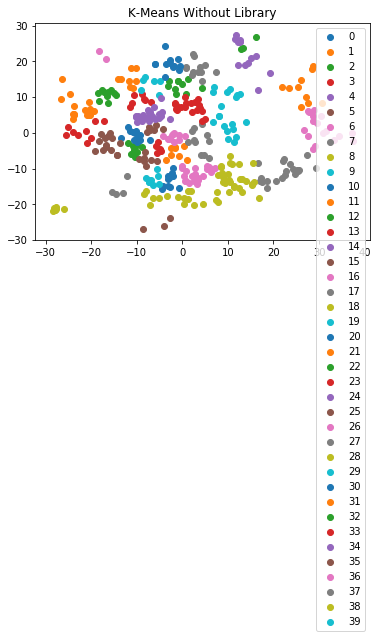

In [14]:
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(X_train_std)

#Applying our function
#k=40 because of 40 
label = kmeans(df,40,1000)

#Visualize the results

u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.title('K-Means Without Library')
plt.show()
